In [23]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
appName= "hive_pyspark"
master= "local"
spark = SparkSession.builder \
	.master(master).appName(appName).enableHiveSupport().getOrCreate()


In [25]:
spark = SparkSession.builder \
	.master(master).appName(appName).enableHiveSupport().getOrCreate()

In [26]:
df=spark.sql("show databases")
df.show()

Py4JError: An error occurred while calling o57.toString. Trace:
java.lang.IllegalArgumentException: object is not an instance of declaring class
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)



In [27]:
datafile=spark.read.csv("/C:/Users/Aditya/Downloads/BigDataHadoop_SparkExam/Dataset/boston.csv",header=True)
datafile.show(5)

+-----------+---+-----------+----+-----------+-----------+-----------+-----------+---+---+-----------+-----------+-----------+-----------+
|       CRIM| ZN|      INDUS|CHAS|        NOX|         RM|        AGE|        DIS|RAD|TAX|         PT|          B|      LSTAT|         MV|
+-----------+---+-----------+----+-----------+-----------+-----------+-----------+---+---+-----------+-----------+-----------+-----------+
|    0.00632| 18|2.309999943|   0|0.537999988|6.574999809|65.19999695|4.090000153|  1|296|15.30000019|396.8999939|4.980000019|         24|
|0.027310001|  0|7.070000172|   0|0.469000012|6.421000004|78.90000153|4.967100143|  2|242|17.79999924|396.8999939|9.140000343|21.60000038|
|    0.02729|  0|7.070000172|   0|0.469000012|7.184999943|61.09999847|4.967100143|  2|242|17.79999924|392.8299866| 4.03000021|34.70000076|
|0.032370001|  0|2.180000067|   0|0.458000004|6.998000145|45.79999924|6.062200069|  3|222|18.70000076|394.6300049|2.940000057|33.40000153|
|0.069049999|  0|2.18000006

In [28]:
datafile.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,506,3.6135235608162057,8.601545086715594,0.00632,9.966540337
ZN,506,11.363636363636363,23.32245299451514,0,95
INDUS,506,11.136778749531626,6.86035298095724,0.460000008,9.899999619
CHAS,506,0.0691699604743083,0.2539940413404101,0,1
NOX,506,0.5546950602312246,0.1158776754570543,0.38499999,0.870999992
RM,506,6.28463438896641,0.7026171549511354,3.561000109,8.779999733
AGE,506,68.57490120115612,28.148861532793276,10,99.30000305
DIS,506,3.7950426960059325,2.105710142043288,1.129600048,9.222900391
RAD,506,9.549407114624506,8.707259384239366,1,8


* Question 1 : Read the given CSV file in a Hive table

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv(r"C:\Users\Aditya\Downloads\BigDataHadoop_SparkExam\Dataset\boston.csv")

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


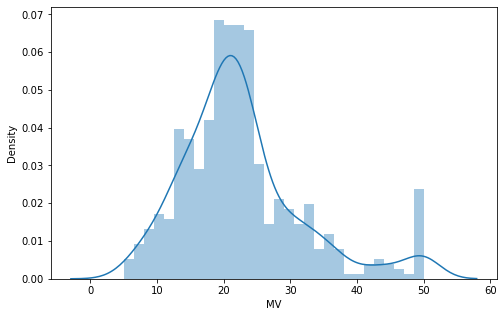

In [6]:
# checking plot of target variable 
plt.figure(figsize=[8,5]) 
sns.distplot(df['MV'], bins=30) 
plt.show()

<AxesSubplot:>

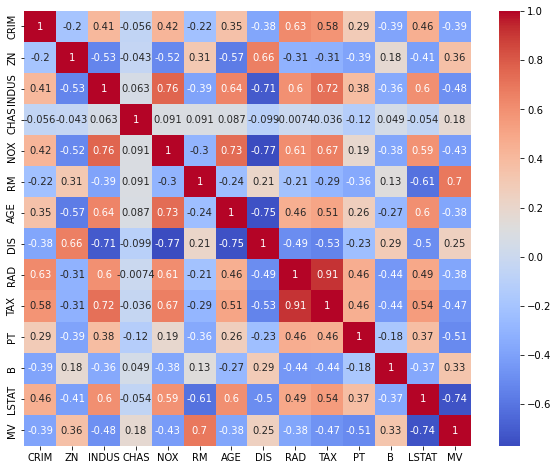

In [8]:
# checking the correlation between dependent and independent variable 
plt.figure(figsize=[10,8]) 
sns.heatmap(df.corr(),annot= True,cmap='coolwarm')

In [9]:
# treatment of outliers 
def outlier_capping(x): 
    x = x.clip(upper = x.quantile(0.99)) 
    x = x.clip(lower = x.quantile(0.01)) 
    return x

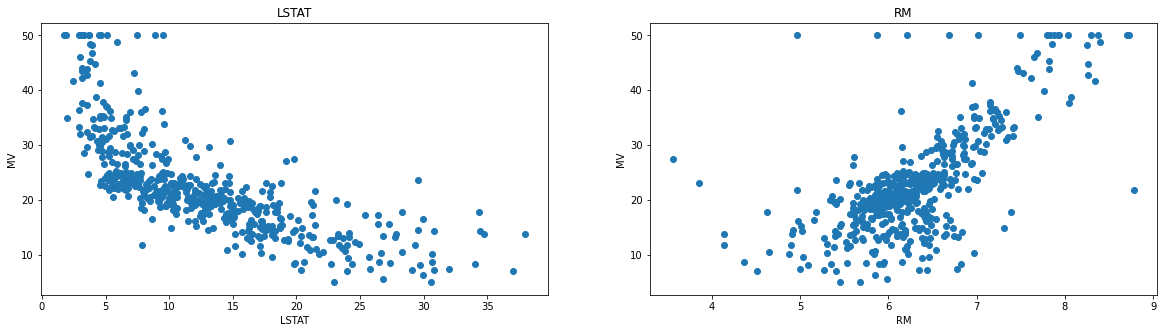

In [15]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MV')

In [13]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MV']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [22]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129340786542
R2 score is 0.6300745175364755


The model performance for testing set
--------------------------------------
RMSE is 5.137400797739368
R2 score is 0.6628996906404767
